In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import special
from scipy import signal

In [20]:
# genero data sintética
dominio = np.linspace(-5, 5, 50)
data0 = special.erf(dominio)/2 + 0.5
data1 = (np.convolve(np.concatenate(  [ [x]*1000 for x in data0 ]  ), [1/100]*100, mode = "same") + np.random.normal(0, 0.002, len(data0)*1000))[100:-100]
tiempo1 = np.arange(len(data1)) * 0.001
mediciones1 = np.zeros((2, len(data1)))
mediciones1[0] = tiempo1
mediciones1[1] = data1
# guardar la data sintética
np.savetxt( "mediciones.txt", mediciones1 )

Text(0, 0.5, 'Intensidad [a.u.]')

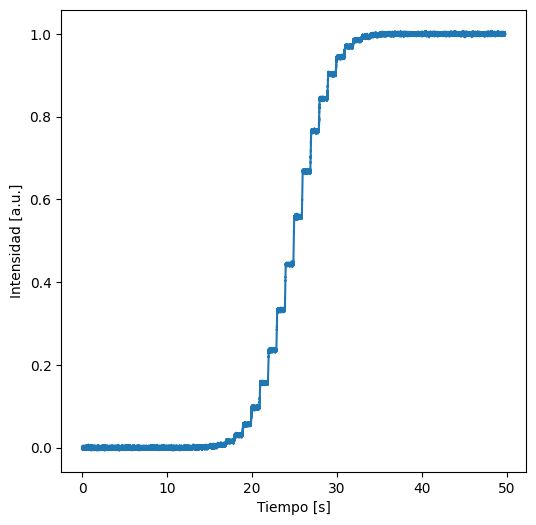

In [21]:
# cargo las mediciones
mediciones = np.loadtxt("mediciones.txt")
intensidad0 = mediciones[1]
tiempo0 = mediciones[0]
plt.figure( figsize = [6,6] )
plt.plot(tiempo0, intensidad0)
plt.xlabel("Tiempo [s]")
plt.ylabel("Intensidad [a.u.]")

(-0.0001, 0.08)

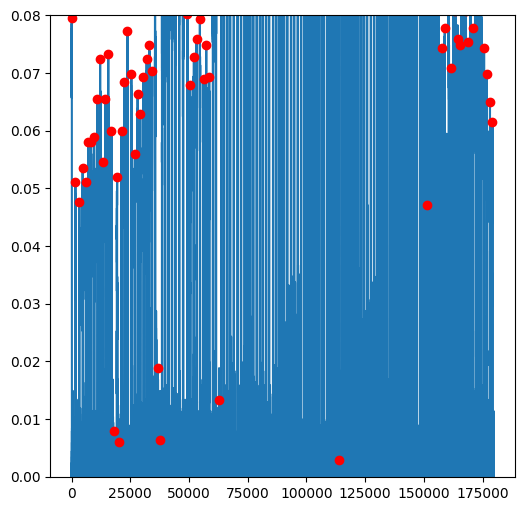

In [31]:
k0 = 200 # suavizo para
derivada = np.diff( np.convolve(intensidad0, [1/k0]*k0, mode = "same" ) )#[k0:-k0]
picos, alturas = signal.find_peaks(  derivada, distance = 900 )

plt.figure( figsize = [6,6] )
plt.plot(  derivada  )
plt.plot(picos, derivada[picos], "o", color = "r")
plt.ylim( [-0.0001, 0.08] )
#plt.xlim( [0,25000] )

/tmp/ipython-input-1100644046.py:1: UserWarning: Input line 29994 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  mediciones = np.loadtxt("filamento.txt",skiprows=4,dtype=str)


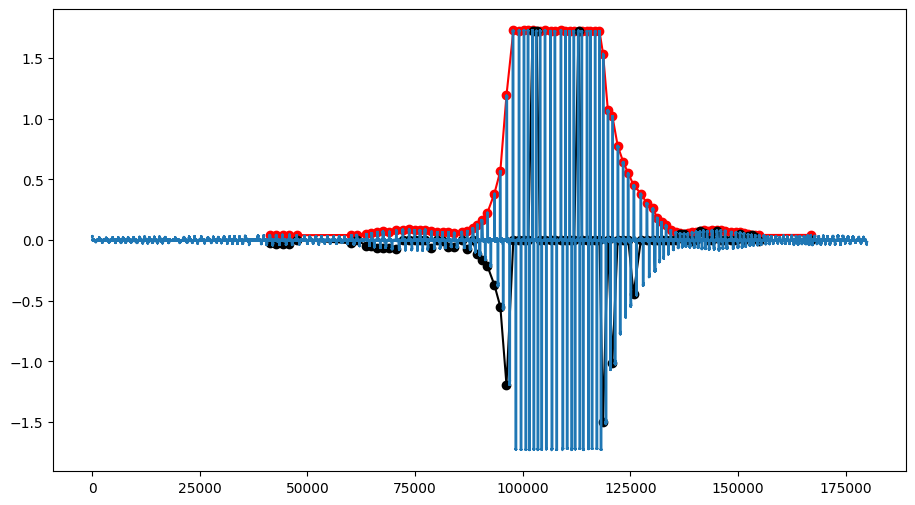

In [23]:
mediciones = np.loadtxt("filamento.txt",skiprows=4,dtype=str)
mediciones = np.char.replace(mediciones, ',', '.').astype(float)
mediciones = mediciones.T
intensidad0 = mediciones[1]
tiempo0 = mediciones[0]
k0 = 200 # suavizo para
derivada = np.diff( np.convolve(intensidad0, [1/450]*k0, mode = "same" ) )#[k0:-k0]
picos, alturas = signal.find_peaks(  derivada, distance = 700 )
minimos, _ = signal.find_peaks(  -derivada, distance = 900 )
picos = picos[derivada[picos] > 0.04]
minimos = minimos[derivada[minimos] < -0.04]
plt.figure( figsize = [11,6] )
plt.plot(picos, derivada[picos], color = "r", marker = "o")
plt.plot(picos, derivada[picos+750] , color = "black", marker = "o")
#plt.plot(minimos,derivada[minimos],color = 'black',marker = "o")
plt.plot(derivada)
#plt.ylim(0.02,0.05)
#plt.xlim(45740,46000)

IndexError: index 179989 is out of bounds for axis 0 with size 179989

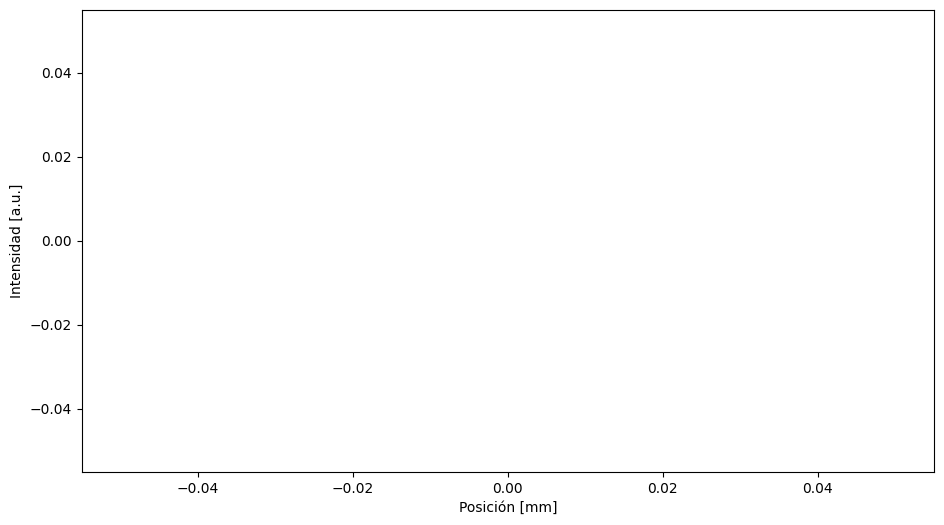

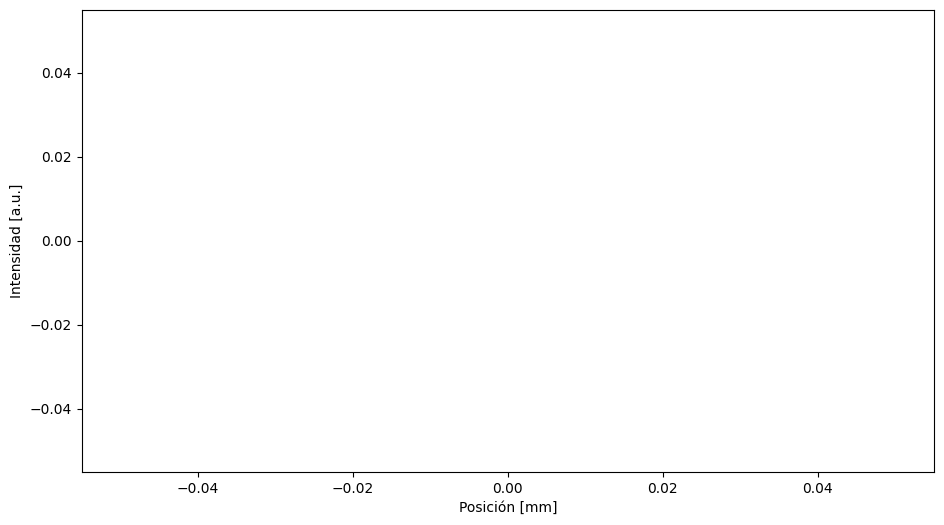

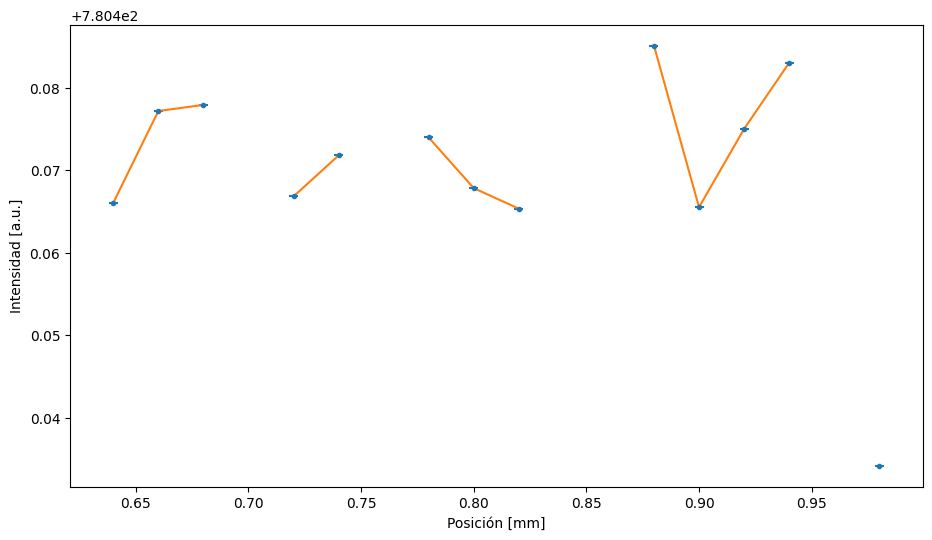

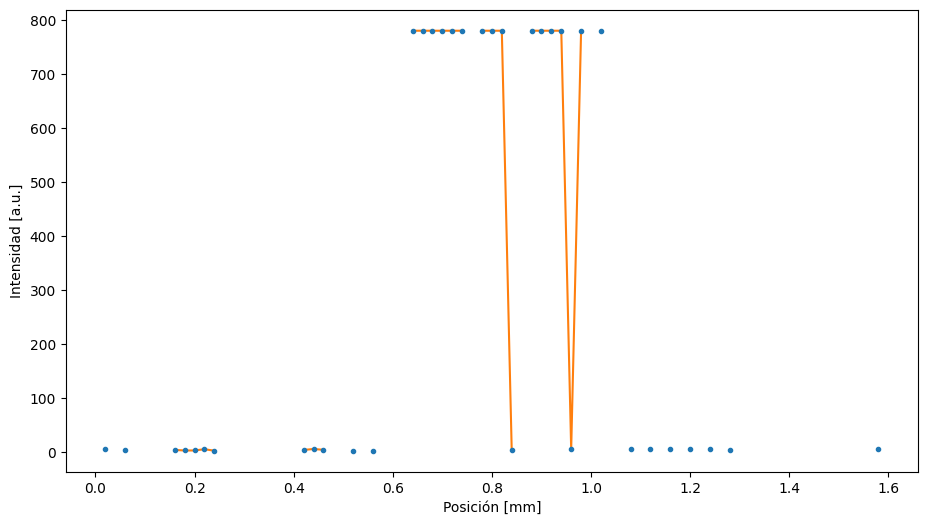

In [24]:
for x in [0.015,0.02,0.5,1,100]:
  def rango(intensidad,picos,i,x):
    n0 = 0
    n1 = 0
    while np.abs(intensidad[picos[i]+20] - intensidad[20+picos[i] + n0])< x:
      n0 += 1
    while np.abs(intensidad[picos[i]-20] - intensidad[-20+picos[i] - n1])< x:
      n1 += 1
    if n0 > n1:
      return picos[i]+20, picos[i] + n0-20
    else:
      return picos[i]-n1+20, picos[i]-20

  def nada(i,picos):
    if np.abs(intensidad0[picos[i]] - intensidad0[picos[i]+delta]) > np.abs(intensidad0[picos[i]] - intensidad0[picos[i]-delta]):
      return picos[i]-delta, picos[i]
    else:
      return picos[i], picos[i]+delta
  picos = picos[derivada[picos] > 0.04]
  delta = 50 # para evitar los tiempos en los que se modificaba la posición
  paso = 0.02 # mm

  intensidad = np.array([ np.mean( intensidad0[rango(intensidad0,picos,i,x)[0] :rango(intensidad0,picos,i,x)[1]] ) for i in range(len(picos)-1) ])
  error_intensidad = np.array([ np.std( intensidad0[picos[i] :picos[i] + delta] ) for i in range(len(picos)-1) ])
  posicion = np.arange(len(intensidad)) * paso

  plt.figure( figsize = [11,6] )
  plt.errorbar(posicion, intensidad, yerr = error_intensidad, xerr = 0.002, fmt = ".")
  plt.plot(posicion,intensidad )
  plt.xlabel("Posición [mm]")
  plt.ylabel("Intensidad [a.u.]")
#plt.xlim(0,3)
#plt.ylim(0,50)


In [ ]:
# visualizar las regiones de interés
region = 16
plt.figure( figsize = [6,6], tight_layout = True )
plt.subplot(2,1,1)
plt.plot( tiempo0[picos[region]-100:picos[region + 1]+100], intensidad0[picos[region]-100:picos[region + 1]+100])
plt.axvline(x = tiempo0[picos[region]], color = "r")
plt.axvline(x = tiempo0[picos[region + 1]], color = "r")

plt.plot( tiempo0[picos[region]+delta:picos[region + 1]-delta], intensidad0[picos[region]+delta:picos[region + 1]-delta], c = "g")
plt.axvline(x = tiempo0[picos[region] + delta], color = "g")
plt.axvline(x = tiempo0[picos[region + 1] - delta], color = "g")
plt.xticks([],[])
plt.text(  x = tiempo0[picos[region + 1] - delta], y = np.max( intensidad0[picos[region]-100:picos[region + 1]+100] ), s =  "Región de promediado  ", ha = "right", va = "center", color = "g" )

plt.subplot(2,1,2)
plt.plot( tiempo0[picos[region]-100:picos[region + 1]+100], derivada[picos[region]-100:picos[region + 1]+100])
plt.axvline(x = tiempo0[picos[region]], color = "r")
plt.axvline(x = tiempo0[picos[region + 1]], color = "r")
plt.text(  x = tiempo0[picos[region] ], y = np.max(  derivada[picos[region]-100:picos[region + 1]+100] ), s =  " Picos", ha = "left", va = "center", color = "r" )

